In [12]:
seoul <- read.csv(("DataBackup/newSeoul2019.csv") )
# seoul19 <- subset(seoul, 년도==2019)


In [13]:
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [14]:
str(seoul)
rownames(seoul) <- c()
summary(seoul)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [16]:
# NA 값 확인
for(i in 1: ncol(seoul)){
    cat( colnames(seoul)[i], ":" , sum(is.na(seoul[,i])) ,"\n")
}

년도 : 0 
월 : 0 
자치구명 : 0 
발생건수 : 0 
사망자수 : 0 
부상자수 : 0 


In [17]:
# 발생건수와 부상자수 의 상관 계수 확인
cor(seoul$발생건수, seoul$부상자수) 


[1] 0.9808932

> 98% 관계가 있다. 발생건수가 증가할수록 부상자수도 증가한다

In [18]:
# 전체 상관계수 확인
cor(seoul[-c(3)])


,년도,월,발생건수,사망자수,부상자수
년도,1.00000000,0.00000000,-0.03593207,-0.14916172,-0.06775112
월,0.00000000,1.00000000,0.12265786,0.03542378,0.10547709
발생건수,-0.03593207,0.12265786,1.00000000,0.23871478,0.98089324
사망자수,-0.14916172,0.03542378,0.23871478,1.00000000,0.23730192
부상자수,-0.06775112,0.10547709,0.98089324,0.23730192,1.00000000


> 발생건수와 부상자수 외 유의미한 상관관계를 가진 변수가 없다 <br>
> 발생건수와 부상자수로 선형회귀 사용할 수 있다고 판단.

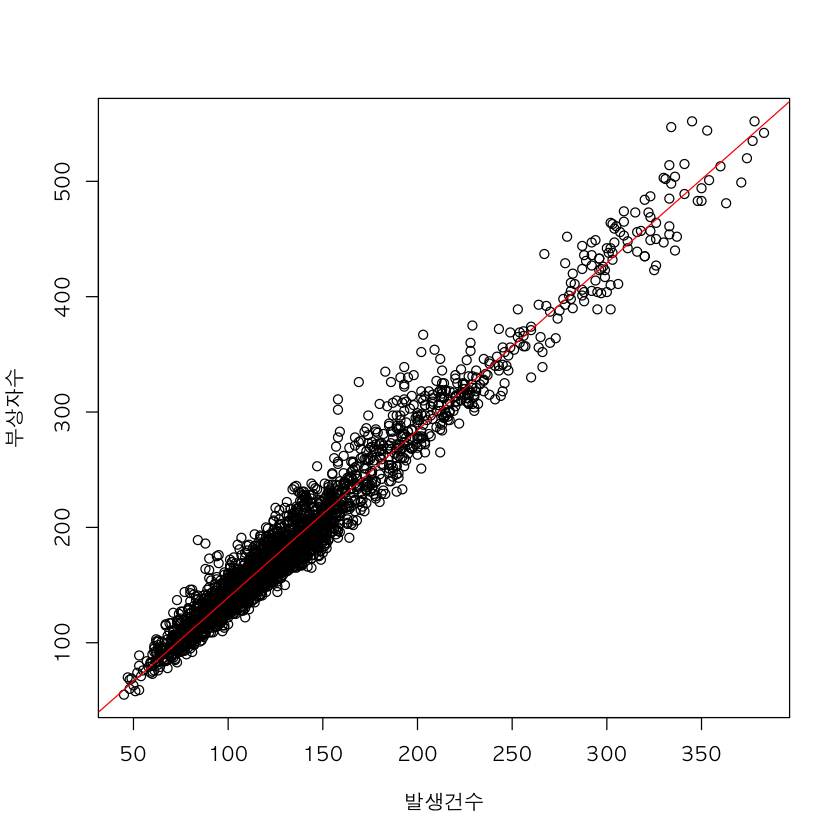

In [19]:
options(warn = -1)
par( family = 'AppleGothic' , bg = 'white' )
plot(seoul$부상자수 ~ seoul$발생건수 , xlab = '발생건수' , ylab = '부상자수')

# 회귀선
r <- lm(seoul$부상자수 ~ seoul$발생건수)
abline(r , col = 'red')

In [20]:
summary(r)


Call:
lm(formula = seoul$부상자수 ~ seoul$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.154  -9.797  -1.421   7.611  87.718 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.895918   0.794301  -7.423 1.53e-13 ***
seoul$발생건수  1.450495   0.005539 261.890  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.23 on 2698 degrees of freedom
Multiple R-squared:  0.9622,	Adjusted R-squared:  0.9621 
F-statistic: 6.859e+04 on 1 and 2698 DF,  p-value: < 2.2e-16


In [21]:
r


Call:
lm(formula = seoul$부상자수 ~ seoul$발생건수)

Coefficients:
   (Intercept)  seoul$발생건수  
        -5.896           1.450  


> 선형회귀 결과 (발생건수로 부상자수 계산) <br>
식 : Y =  1.450495 X + (-5.895918) <br>
표준오차 : 15.23 <br>
R ^2 : 0.9622

## 머신러닝

In [22]:
library(caret)
library(nnet) # 인공 신경망 모델 , 다항 로지스틱
library(party) # 의사결정나무
library(randomForest) # 랜덤 포레스트
library(e1071) # SVM

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [51]:
samp <- createDataPartition(seoul$월, p=0.7, list=F)
# 학습용 데이터 셋
data_tr <- seoul[samp,]
# 검증용 데이터 셋 
data_test <- seoul[-samp,]

# 문제 및 정답 만들기
x_test <- subset(data_test, select = -부상자수) # 문제
y_test <- data_test$부상자수 # 정답

# 인공신경망용 표준화 데이터 셋
scseoul = cbind(scale(seoul[-c(1,2,3,6)]) , seoul[6])

# 학습용 데이터 셋
data_tr_sc <- scseoul[samp,]
# 검증용 데이터 셋 
data_test_sc <- scseoul[-samp,]
# 문제 및 정답 만들기
x_test_sc <- subset(data_test_sc, select = -부상자수) # 문제
y_test_sc <- data_test_sc$부상자수 # 정답


In [59]:
sum_rf <- 0
sum_nnet <- 0
sum_ctree <- 0
sum_svm <- 0
  
for (i in 1:5){
# RF train
model_rf <- randomForest(부상자수 ~ 발생건수 , data = data_tr, ntree = 100)
pred_rf <- predict(model_rf, x_test)
예측력_rf <-  1 - (sum((y_test - pred_rf)^2) / sum((y_test - mean(y_test))^2))

# 인공신경망
model_nnet <- nnet(부상자수 ~ 발생건수, data = data_tr_sc , size = 3 , linout = TRUE , trace = FALSE)
pred_nnet <- predict(model_nnet, x_test_sc, type="raw")
예측력_nnet <- 1 - (sum((y_test_sc - pred_nnet)^2) / sum((y_test_sc - mean(y_test_sc))^2))

# 의사결정나무
model_ctree <- ctree(부상자수 ~ 발생건수, data=data_tr)
pred_ctree <- predict(model_ctree, x_test)
예측력_ctree <- 1 - (sum((y_test - pred_ctree)^2) / sum((y_test - mean(y_test))^2))

# SVM test
model_svm <- svm(부상자수 ~ 발생건수, data=data_tr)
pred_svm <- predict(model_svm, x_test, type = "raw")
예측력_svm <- 1 - (sum((y_test - pred_svm)^2) / sum((y_test - mean(y_test))^2))

sum_rf <- sum_rf + 예측력_rf
sum_ctree <- sum_ctree + 예측력_ctree
sum_svm <- sum_svm + 예측력_svm
sum_nnet <- sum_nnet + 예측력_nnet

}
cat("RF : " , sum_rf/5, "\n")
cat("인공신경망 : " , sum_nnet/5, "\n") # 가장 정확도 높음 
cat("의사결정나무 : " , sum_ctree/5, "\n")
cat("SVM : " , sum_svm/5, "\n")

RF :  0.9580716 
인공신경망 :  0.9001544 
의사결정나무 :  0.9599619 
SVM :  0.9619932 


> 최종 모델은 다중선형회귀식의 R^2 값 0.9622와 가장 유사한 SVM (0.9619932)로 선정

In [60]:
# 최종 모델 학습
final_model_svm <- svm(부상자수 ~ 발생건수, data= seoul)

# predict(final_model_svm, x_test, type = "raw")

In [62]:
# RDS 파일로 저장 
saveRDS(final_model_svm, "DataBackup/final_model_svm.rds")

In [63]:
md <- readRDS("DataBackup/final_model_svm.rds") 

In [68]:
# 발생건수가 n 회일때 저장한 최종 모델로 예측 
predict(md , (발생건수 = 100) , type = "raw")
predict(md , (발생건수 = 150) , type = "raw")
predict(md , (발생건수 = 250) , type = "raw")

1 
139.1483

1 
207.3863

1 
350.1101